#### Warmup 1: Review of Series: Fill in the blanks
1. A pandas Series can be made from a ____ or a _______.
2. A pandas Series has both ____ (similar to a dictionary key) and _____ ______ (similar to list index). 
3. index --> .???,      integer position --> .???
4. If creating a Series from a list of values, index and integer position are ______ (same or different?) 

In [107]:
# Warmup 2:  What is Tuple unpacking?
coordinates = (-324, 582, 23)
x = coordinates[0]
y = coordinates[1]
z = coordinates[2]
print (x)

# there is a quicker way to do this in Python, called Tuple unpacking
a,b,c = 

-324


In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Lecture 37: Bar plots

## https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.bar.html


In [15]:
import pandas as pd
from pandas import DataFrame, Series
import sqlite3
import os

In [16]:
# Without this Jupyter notebook cannot display the "first" plot in older versions of Python / mathplotlib / jupyter
%matplotlib inline

### Helpful documentation and an overview of how Matplotlib works
https://matplotlib.org/stable/tutorials/introductory/usage.html


In [85]:
# matplotlib is a plotting module similar to MATLAB
import matplotlib
from matplotlib import pyplot as plt

# matplotlib is highly configurable, acts like a style sheet for Pandas Plots
# rc stands for runtime config, syntax is like a dictionary

#matplotlib.rcParams
#matplotlib.rcParams["font.size"]          # show current font size setting
matplotlib.rcParams["font.size"] = 18   # change current font size setting


In [10]:
s = Series([5000000, 3000000, 2000000])
s

0    5000000
1    3000000
2    2000000
dtype: int64

## Making a Pie plot from a Series
### https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.pie.html

matplotlib.axes._subplots.AxesSubplot

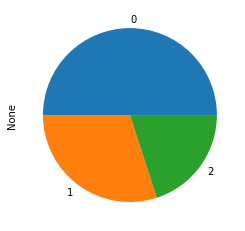

In [18]:
type(s.plot.pie() ) # check out the type


### What's wrong with the above plot?

- The labels are all wrong.
- From where are you getting 0, 1, and 2 as labels? ---> let's fix just this


<AxesSubplot:ylabel='None'>

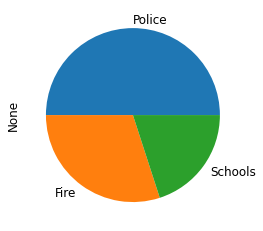

In [98]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})
s.plot.pie()

### We will learn how to fix other things in a future lecture
- We can only see the relative proportions, not the absolute amounts
- It says "None" on the y-axis
- The font is tiny.
- No title

## Bar plot: Better than a Pie Plot


<AxesSubplot:>

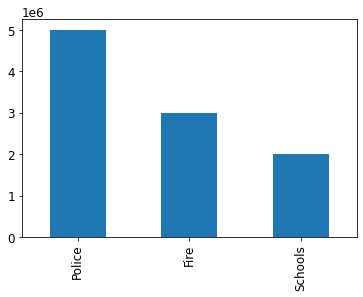

In [100]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})

# make a bar plot...notice the type
s.plot.bar() 

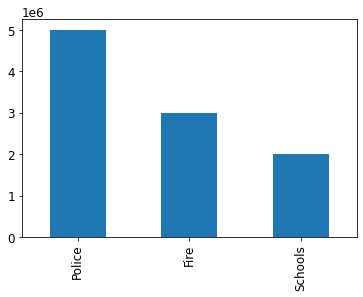

In [101]:
# if we store the returned object in a variable, we can configure the AxesSubplot
# typically the variable name used is 'ax'
ax = s.plot.bar() 

### How can we set the x-axis, y-axis labels, and title?
- use the Axes object

[Text(0, 0, 'Police'), Text(1, 0, 'Fire'), Text(2, 0, 'Schools')]

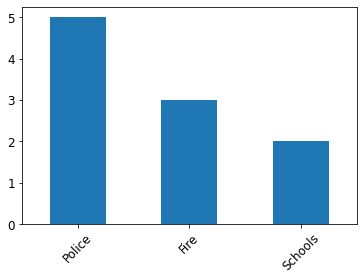

In [103]:
# better plot:
# instead of 1e6, divide all values in s by 1 million
ax = (s / 1000000).plot.bar()

# give the x ticklabels a rotation of 45 degrees
ax.set_xticklabels(list(s.index), rotation = 45)

# set the y_label to "Dollars (Millions)"
#ax.set_ylabel("Dollars (Millions)")

# set the title to "Annual City Spending"


### How can we change the figure size?
- figsize keyword argument
- should be a tuple with two values: width and height (in inches)



Text(0.5, 1.0, 'Annual City Spending')

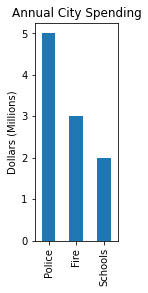

In [35]:
ax = (s / 1000000).plot.bar(figsize = (1.5, 4))
ax.set_ylabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

### How can we make the bars horizontal?
### https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.barh.html
- switch figsize arguments
- change y-label to x-label

Text(0.5, 1.0, 'Annual City Spending')

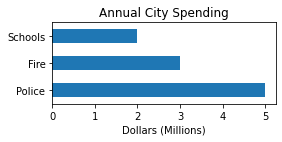

In [36]:
# paste the previous code cell here and modify to be horizontal bar


### Change bar color by using the argument color= ' ' 
<pre>
- plot.bar(figsize = (width,height ) , color = ??? )
- 8 standard colors: r, g, b, c, m, y, b, w    color = 'm'
- can use RGB Hex colors with a leading #:     color = "#01abf0"
- can use value of grey between 0 and 1        color = 0.6
- can use a tuple (r,g,b) between 0 and 1      color = (0, .3, .4)
</pre>

In [ ]:
# color as a single char

In [ ]:
# color as a Hex rgb

In [ ]:
# color as grey or tuple of (r,g,b)

### How can we mark gridlines?
- use ax.grid()

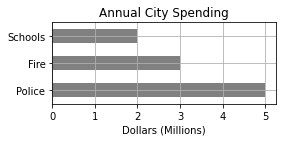

In [39]:
# copy the previous code and add grid lines


### How can we erase the top and right-hand side margin?
- use ax.spines ---> gives list of spines

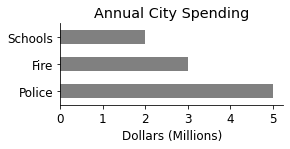

In [104]:
ax = (s / 1000000).plot.barh(figsize = (4, 1.5), color = "0.5")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# change to  "bottom" and "left"

### How can we configure the AxesSubplot ahead of time? 
### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
- returns a tuple of figure, AxesSubplot
- we can use it to write a function that applies all the plot add-on aspects for all the plots
- the reason? make a single plotting "page setup" and then apply it to all the plots in a report

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

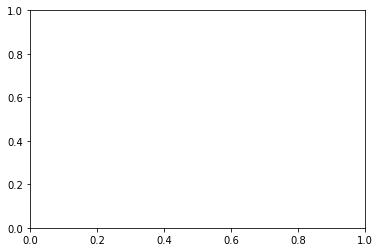

In [44]:
from matplotlib import pyplot as plt
ax = plt.subplots() 
ax # a tuple was returned! 
# the first thing is the figure...we don't do much with that
# the 2nd thing was the axes subplot...we can pre-configure this

### Function to pre-configure axes for later use

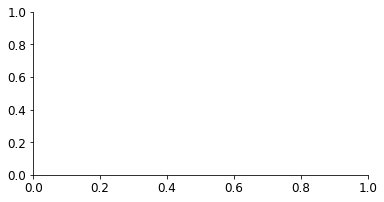

In [105]:
def config_axes(width = 6, height = 3, spines_value = False):
    '''creates an axes subplot
    sets the width and height
    sets the top and right spines'''
    # Tuple unpacking: two things returned, capture each
    _, ax = plt.subplots(figsize = (width, height))
    ax.spines["top"].set_visible(spines_value)
    ax.spines["right"].set_visible(spines_value)
    return ax

my_axes = config_axes()


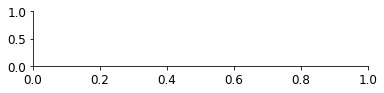

In [96]:
my_axes = config_axes(6,1)

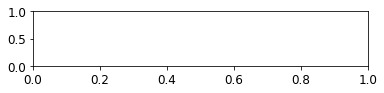

In [94]:
my_axes = config_axes(6,1, True)

Text(0.5, 1.0, 'Annual City Spending')

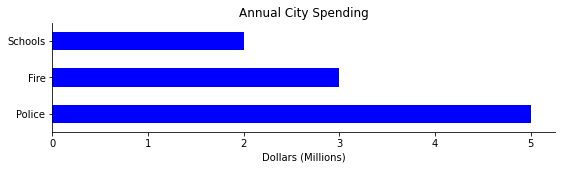

In [67]:
# when you make a plot, one keyword argument is 'ax'
# https://pandas.pydata.org/pandas-docs/version/0.24.2/reference/api/pandas.Series.plot.html
# this not to be confused with the ax we were using for our variable
my_axes = config_axes(9, 2)
my_axes = (s / 1000000).plot.barh(color = "b", ax = my_axes)
my_axes.set_xlabel("Dollars (Millions)")
my_axes.set_title("Annual City Spending")

## bus.db examples

In [69]:
path = "bus.db"
assert os.path.exists(path)
conn = sqlite3.connect(path)

### Recap on exploring SQL database


In [70]:
pd.read_sql("""
SELECT * from
sqlite_master""", conn)

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,index,ix_boarding_index,boarding,3,"CREATE INDEX ""ix_boarding_index""ON ""boarding"" ..."
2,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."
3,index,ix_routes_index,routes,57,"CREATE INDEX ""ix_routes_index""ON ""routes"" (""in..."


In [71]:
pd.read_sql("""
SELECT * from
boarding""", conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34
3,3,1164,6,43.106465,-89.340021,10.59
4,4,1167,3,43.077867,-89.369993,3.11
...,...,...,...,...,...,...
3967,3967,6533,67,43.057329,-89.510756,16.88
3968,3968,6539,15,43.064361,-89.517233,15.53
3969,3969,6541,3,43.049934,-89.478167,2.56
3970,3970,6543,70,43.093289,-89.501726,0.11


##### What are the top routes, and how many people ride them daily?

In [75]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)
df

,Route,daily
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55
5,4,2656.99
6,15,2179.98
7,38,1955.85
8,28,1868.31
9,5,1634.69


#### Let's take the daily column out as a Series ...

<AxesSubplot:>

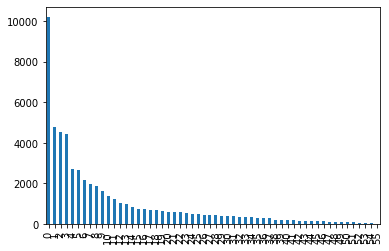

In [76]:
s = df["daily"]
s.plot.bar()

### Oops, too much data. Let's filter down to top 5 routes. How can we do that in SQL?

In [77]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
LIMIT 5
""", conn)
df

,Route,daily
0,80,10211.79
1,2,4808.03
2,6,4537.02
3,10,4425.23
4,3,2708.55


<AxesSubplot:>

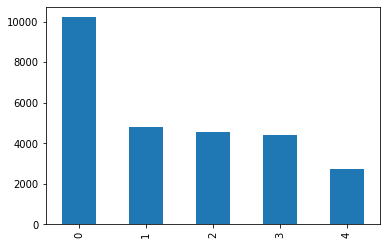

In [78]:
s = df["daily"]
s.plot.bar()

#### Huh, what exactly is route 0? Where is that coming from?
- Oops, it is coming from dataframe row index!
- Let's fix that: we can use df.set_index(...)

<AxesSubplot:xlabel='Route'>

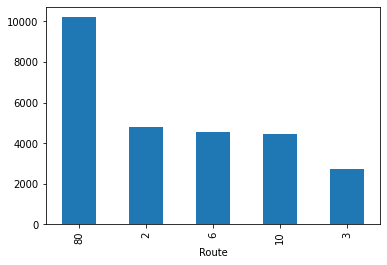

In [79]:
df = df.set_index("Route")
s = df["daily"]
s.plot.bar()

### Wouldn't it be nice to have an "other" bar to represent other routes?
- we have to now get rid of LIMIT clause
- we have to deal with other routes using pandas

In [80]:
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)

df = df.set_index("Route")
s = df["daily"]
df.head()

,daily
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


#### We are back to plotting all route bars ...

<AxesSubplot:xlabel='Route'>

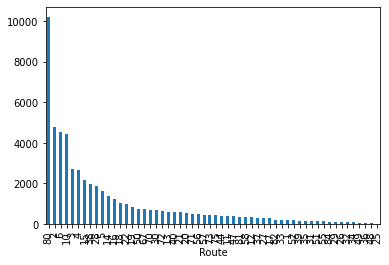

In [81]:
s.plot.bar()

### How can we slice a pandas dataframe?
- Recall that .iloc allows us to do slicing.
- For reproducing previous 5-route plot, we just need to take first 5 route details and populate into a series s.
- For the "other" part, we want all the rows in dataframe after row 5 summed up together.
- What should start and end in start:end be for getting the above two slices?
- Once we compute "other" count, we can add that back to the series s.

In [82]:
s = df["daily"].iloc[:5]
s["other"] = df["daily"].iloc[5:].sum()
s

Route
80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
other    29296.56
Name: daily, dtype: float64

<AxesSubplot:xlabel='Route'>

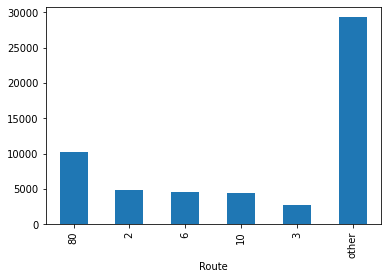

In [83]:
s.plot.bar()

### Let's fix the plot asthetics ...

Text(0, 0.5, 'Rides/Day (Thousands)')

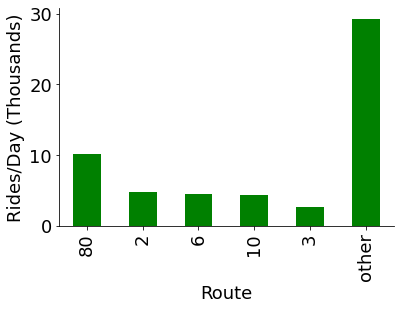

In [86]:
my_axes = config_axes(width=6,height=4)
(s / 1000).plot.bar(color = "g", ax = my_axes)
my_axes.set_ylabel("Rides/Day (Thousands)")
# Where did the xlabel come from? the dataframe index